In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from copy import copy
from tqdm.notebook import trange, tqdm

from hazma.vector_mediator import KineticMixingGeV, BLGeV

## Plot Config

In [2]:
jonquil = ["#e6c229", "#f17105", "#d11149", "#6610f2", "#1a8fe3"]

redsalsa = [
    "#f94144", 
    "#f3722c", 
    "#f8961e", 
    "#f9844a", 
    "#f9c74f", 
    "#90be6d", 
    "#43aa8b", 
    "#4d908e", 
    "#577590", 
    "#277da1"
]

rich_black_fogra = [
    "#001219", 
    "#005f73", 
    "#0a9396", 
    "#94d2bd", 
    "#e9d8a6", 
    "#ee9b00", 
    "#ca6702", 
    "#bb3e03", 
    "#ae2012", 
    "#9b2226"
]


sinopia = [
    "#cc4400", 
    "#d66915", 
    "#e08e29", 
    "#f0c761", 
    "#ffff99", 
    "#c2fcff", 
    "#7cc6de", 
    "#3890bc", 
    "#1c489a", 
    "#000077"
]


darkslateblue = ["#54478c", "#2c699a", "#048ba8", "#0db39e", "#16db93", "#83e377", "#b9e769", "#efea5a", "#f1c453", "#f29e4c"]

sequential_single_b = ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'] 

sequential_multi_by = ['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58']
sequential_multi_bw = ['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#045a8d','#023858']

diverging_rp = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
diverging_rb = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
diverging_rg = ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#ffffbf','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837'] 

qualitative = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33']
qualitative2 = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
qualitative3 = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']


## Kinetic Mixing

In [3]:
def widths(model: KineticMixingGeV):
    ws = dict()

    ws["e e"] = model.width_v_to_e_e()
    ws["mu mu"] = model.width_v_to_mu_mu()
    ws["pi pi"] = model.width_v_to_pi_pi()
    ws["k k"] = model.width_v_to_k_k()
    ws["k0 k0"] = model.width_v_to_k0_k0()
    ws["pi0 g"] = model.width_v_to_pi0_gamma()
    ws["eta g"] = model.width_v_to_eta_gamma()
    ws["pi0 pi0 g"] = model.width_v_to_pi0_pi0_gamma()
    ws["pi phi"] = model.width_v_to_pi0_phi()
    ws["eta phi"] = model.width_v_to_eta_phi()
    ws["eta omega"] = model.width_v_to_eta_omega()
    ws["pi pi pi0"] = model.width_v_to_pi_pi_pi0(npts=1<<15)
    ws["pi pi eta"] = model.width_v_to_pi_pi_eta()
    ws["pi pi etap"] = model.width_v_to_pi_pi_etap()
    ws["pi pi omega"] = model.width_v_to_pi_pi_omega()
    ws["pi0 pi0 omega"] = model.width_v_to_pi0_pi0_omega()
    ws["pi0 k0 k0"] = model.width_v_to_pi0_k0_k0()
    ws["pi0 k k"] = model.width_v_to_pi0_k_k()
    ws["pi k k0"] = 2 * model.width_v_to_pi_k_k0()
    ws["pi pi pi pi"] = model.width_v_to_pi_pi_pi_pi(npts=1<<16)
    ws["pi pi pi0 pi0"] = model.width_v_to_pi_pi_pi0_pi0(npts=1<<16)

    return ws

In [4]:
mvs = np.geomspace(500, 2e3, 250)
model = KineticMixingGeV(5e3, mvs[-1], 1.0, 1e-3)
ws = {key: np.zeros_like(mvs) for key in widths(model).keys()}

for i, mv in enumerate(mvs):
    print(i)
    model.mv = mv
    for key,val in widths(model).items():
        ws[key][i] = val

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [5]:
brs = {key: val for key,val in ws.items()}
tot = sum(brs.values())

for key, val in brs.items():
    brs[key] = val / tot

brs["l l"] = brs["e e"] + brs["mu mu"]
del brs["e e"]
del brs["mu mu"]

In [6]:
def key_to_label(key):
    if key == "l l":
        return r"$\ell^{+} \ell^{-}$"
    if key == "pi pi":
        return r"$\pi^{+} \pi^{-}$"
    if key == "k k":
        return r"$K^{+} K^{-}$"
    if key == "k0 k0":
        return r"$K^{0} \bar{K}^{0}$"
    if key == "pi0 g":
        return r"$\pi^{0} \gamma$"
    if key == "eta g":
        return r"$\eta \gamma$"
    if key == "pi0 pi0 g":
        return r"$\pi^{0} \pi^{0} \gamma$"
    if key == "pi phi":
        return r"$\pi^{0} \phi$"
    if key == "eta phi":
        return r"$\eta \phi$"
    if key == "eta omega":
        return r"$\eta \omega$"
    if key == "pi pi pi0":
        return r"$\pi^{+} \pi^{-} \pi^{0}$"
    if key == "pi pi eta":
        return r"$\pi^{+} \pi^{-} \eta$"
    if key == "pi pi etap":
        return r"$\pi^{+} \pi^{-} \eta'$"
    if key == "pi pi omega":
        return r"$\pi^{+} \pi^{-} \omega$"
    if key == "pi0 pi0 omega":
        return r"$\pi^{0} \pi^{0} \omega$"
    if key == "pi0 k0 k0":
        return r"$\pi^{0} K^{0} \bar{K}^{0}$"
    if key == "pi0 k k":
        return r"$\pi^{0} K^{+} K^{-}$"
    if key == "pi k k0":
        return r"$\pi^{\pm} K^{\mp} K^{0}$"
    if key == "pi pi pi pi":
        return r"$\pi^{\pm} \pi^{\pm} \pi^{\mp} \pi^{\mp}$"
    if key == "pi pi pi0 pi0":
        return r"$\pi^{\pm} \pi^{\mp} \pi^{0} \pi^{0}$"
    raise ValueError(f"Invalid state: {key}")

def key_to_ls(key):
    if key in ["pi pi", "k k","k0 k0","pi0 g","eta g","pi omega","pi phi","eta phi","eta omega"]:
        return "-"
    else:
        return "--"


def is_two_body(key:str):
    return len(key.split(" ")) == 2

def is_three_body(key):
    return len(key.split(" ")) == 3

def is_four_body(key):
    return len(key.split(" ")) == 4

In [7]:
two_body_conf = {
    "pi pi": {"label": r"$\pi^{+}\pi^{-}$", "color": qualitative[0], "ls": "-"},
    "k k": {"label": r"$K^{+} K^{-}$", "color": qualitative[1], "ls": "dashed"},
    "k0 k0": {"label": r"$K^{0} \bar{K}^{0}$", "color": qualitative[1], "ls": "-."},
    "pi0 g": {"label": r"$\pi^{0} \gamma$", "color": qualitative[2], "ls": "-"},
    "eta g": {"label": r"$\eta \gamma$", "color": qualitative[3], "ls": "-"},
    "pi0 pi0 g": {"label": r"$\pi^{0} \pi^{0} \gamma$", "color": qualitative[4], "ls": "-"},
    "pi phi": {"label": r"$\pi^{0} \phi$", "color": qualitative[5], "ls": "-"},
    "eta phi": {"label": r"$\eta \phi$", "color": qualitative[6], "ls": "-"},
    "eta omega": {"label": r"$\eta \omega$", "color": qualitative[7], "ls": "-"},
    "l l": {"label": r"$\ell^{+} \ell^{-}$", "color": qualitative2[0], "ls": "-"},
}
"pi0 pi0 g"

three_body_conf = {
    "pi pi pi0":{
        "label": r"$\pi^{+} \pi^{-} \pi^{0}$",
        "color": qualitative[1],
        "ls": "-",
    },
    "pi pi eta":{
        "label": r"$\pi^{+} \pi^{-} \eta$",
        "color": qualitative[5],
        "ls": "-",
    },
    "pi pi etap":{
        "label": r"$\pi^{+} \pi^{-} \eta'$",
        "color": qualitative[7],
        "ls": "-",
    },
    "pi pi omega":{
        "label": r"$\pi^{+} \pi^{-} \omega$",
        "color": qualitative[2],
        "ls": "--",
    },
    "pi0 pi0 omega":{
        "label": r"$\pi^{0} \pi^{0} \omega$",
        "color": qualitative[2],
        "ls": "-.",
    },
    "pi0 k0 k0":{
        "label": r"$\pi^{0} K^{0} \bar{K}^{0}$",
        "color": qualitative[3],
        "ls": "--",
    },
    "pi0 k k":{
        "label": r"$\pi^{0} K^{+} K^{-}$",
        "color": qualitative[3],
        "ls": "-.",
    },
    "pi k k0":{
        "label": r"$\pi^{\pm} K^{\mp} K^{0}$",
        "color": qualitative[3],
        "ls": ":",
    },
    "pi0 pi0 g":{
        "label": r"$\pi^{0} \pi^{0} \gamma$",
        "color": qualitative[4],
        "ls": "-",
    },
    # Four-body
    "pi pi pi pi":{
        "label": r"$\pi^{+} \pi^{-} \pi^{+} \pi^{-}$",
        "color": qualitative[0],
        "ls": "--",
    },
    "pi pi pi0 pi0":{
        "label": r"$\pi^{+} \pi^{-} \pi^{0} \pi^{0}$",
        "color": qualitative[0],
        "ls": ":",
    },
}


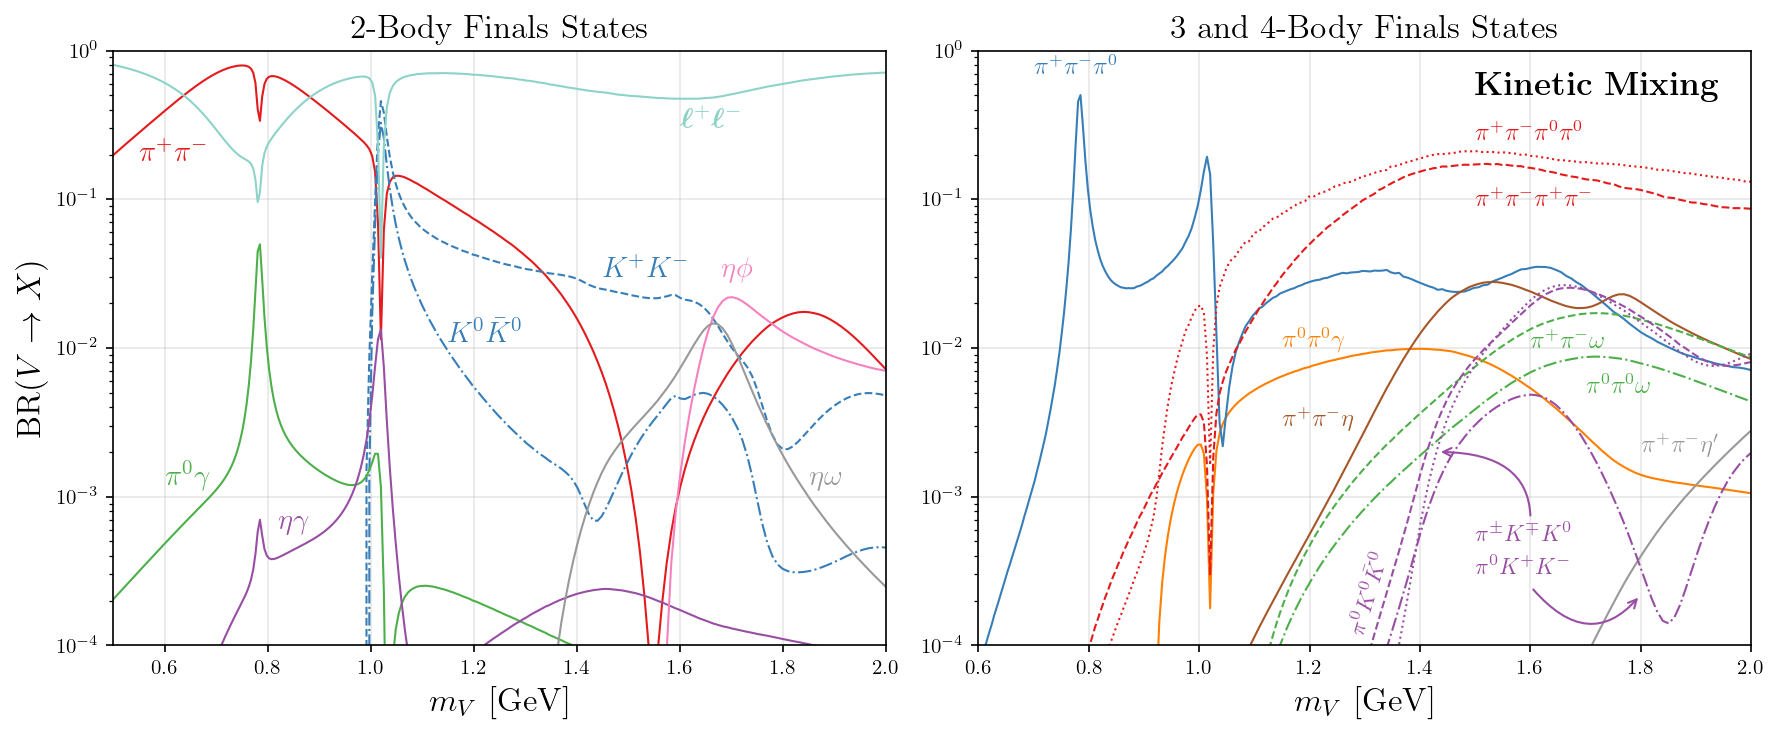

In [8]:

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5),dpi=150)

ylims = (1e-3, 1.1)

twobody = {key: val for key, val in brs.items() if is_two_body(key)}
threebody = {key: val for key, val in brs.items() if is_three_body(key)}
fourbody = {key: val for key, val in brs.items() if is_four_body(key)}

ax1.set_prop_cycle(cycler(color=qualitative))
ax2.set_prop_cycle(cycler(color=qualitative))

for key, val in twobody.items() :
    color = two_body_conf[key]["color"]
    ls = two_body_conf[key]["ls"]
    if np.max(val) > min(ylims):
        ax1.plot(mvs*1e-3, val, label=key_to_label(key), lw=1, color=color, ls=ls)


for key, val in threebody.items():
    color = three_body_conf[key]["color"]
    ls = three_body_conf[key]["ls"]
    if np.max(val) > min(ylims):
        ax2.plot(mvs*1e-3, val, label=key_to_label(key), lw=1, color=color, ls=ls)

for key, val in fourbody.items():
    color = three_body_conf[key]["color"]
    ls = three_body_conf[key]["ls"]
    if np.max(val) > min(ylims):
        ax2.plot(mvs*1e-3, val, label=key_to_label(key), lw=1, color=color, ls=ls)

conf = two_body_conf
ax1.text(0.55, 1.8e-1, conf["pi pi"]["label"], fontdict={"size":14, "color": two_body_conf["pi pi"]["color"]}, rotation=0)
ax1.text(0.6, 1.2e-3, conf["pi0 g"]["label"], fontdict={"size":14, "color": two_body_conf["pi0 g"]["color"]}, rotation=0)
ax1.text(0.82, 6e-4, conf["eta g"]["label"], fontdict={"size":14, "color": two_body_conf["eta g"]["color"]}, rotation=0)
ax1.text(1.45, 3e-2, r"$K^{+} K^{-}$", fontdict={"size":14, "color": two_body_conf["k k"]["color"]}, rotation=0)
ax1.text(1.15, 1.1e-2, r"$K^{0} \bar{K}^{0}$", fontdict={"size":14, "color": two_body_conf["k k"]["color"]}, rotation=0)
ax1.text(1.68, 3e-2, conf["eta phi"]["label"], fontdict={"size":14, "color": two_body_conf["eta phi"]["color"]}, rotation=0)
ax1.text(1.85, 1.2e-3, conf["eta omega"]["label"], fontdict={"size":14, "color": two_body_conf["eta omega"]["color"]}, rotation=0)
# ax1.text(1.62, 4e-4, conf["pi phi"]["label"], fontdict={"size":14, "color": two_body_conf["pi phi"]["color"]}, rotation=0)
ax1.text(1.6, 3e-1, r"$\bm{\ell}^{+}\bm{\ell}^{-}$", fontdict={"size":14, "color": two_body_conf["l l"]["color"]}, rotation=0)

conf = three_body_conf
ax2.text(0.7, 7e-1, conf["pi pi pi0"]["label"], fontdict={"size":12, "color": conf["pi pi pi0"]["color"]})
ax2.text(1.5, 2.5e-1, conf["pi pi pi0 pi0"]["label"], fontdict={"size":12, "color": conf["pi pi pi0 pi0"]["color"]})
ax2.text(1.5, 9e-2, conf["pi pi pi pi"]["label"], fontdict={"size":12, "color": conf["pi pi pi pi"]["color"]})
ax2.text(1.15, 1e-2, conf["pi0 pi0 g"]["label"], fontdict={"size":12, "color": conf["pi0 pi0 g"]["color"]})
ax2.text(1.15, 3e-3, conf["pi pi eta"]["label"], fontdict={"size":12, "color": conf["pi pi eta"]["color"]})
ax2.text(1.6, 1e-2, conf["pi pi omega"]["label"], fontdict={"size":12, "color": conf["pi pi omega"]["color"]})
ax2.text(1.7, 5e-3, conf["pi0 pi0 omega"]["label"], fontdict={"size":12, "color": conf["pi0 pi0 omega"]["color"]})
ax2.text(1.8, 2e-3, conf["pi pi etap"]["label"], fontdict={"size":12, "color": conf["pi pi etap"]["color"]})

color = three_body_conf["pi0 k k"]["color"]

ax2.text(1.5, 3e-4, key_to_label("pi0 k k"), fontdict={"size": 11, "color": three_body_conf["pi0 k k"]["color"]})
ax2.annotate("", xytext=(1.6, 2.5e-4), xy=(1.8, 2.2e-4), arrowprops=dict(arrowstyle="->", color=color, connectionstyle="angle3,angleA=-50,angleB=50") )

ax2.text(1.5, 5e-4, key_to_label("pi k k0"), fontdict={"size": 11, "color": three_body_conf["pi k k0"]["color"]})
ax2.annotate("", xytext=(1.6, 7e-4), xy=(1.43, 2e-3), arrowprops=dict(arrowstyle="->", color=color, connectionstyle="angle3,angleA=90") )

ax2.text(1.27, 1.2e-4, key_to_label("pi0 k0 k0"), fontdict={"size": 11, "color": three_body_conf["pi0 k0 k0"]["color"]}, rotation=73)
# ax2.annotate("", xy=(1.44, 1.3e-4), xytext=(1.3,1.3e-4), arrowprops=dict(arrowstyle="<-", color=color))



ax1.set_yscale('log')
# plt.xscale('log')
# ax1.set_ylim(*ylims)
ax1.set_ylim(1e-4,1e0)
ax1.set_xlim(np.min(mvs)*1e-3, np.max(mvs)*1e-3)
ax1.set_ylabel(r"$\mathrm{BR}(V\to X)$", fontdict={"size": 16})
ax1.set_xlabel(r"$m_{V} \ [\mathrm{GeV}]$", fontdict={"size": 16})

ax2.set_xlabel(r"$m_{V} \ [\mathrm{GeV}]$", fontdict={"size": 16})
ax2.set_ylim(1e-4,1e0)
ax2.set_xlim(0.6, np.max(mvs)*1e-3)
ax2.set_yscale("log")
# ax1.legend()
# ax2.legend()
ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)
# plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 2], ["0.5", "0.6", "0.7", "0.8", "0.9", "1", "2"])
# plt.legend(bbox_to_anchor=(1.4,1.05), loc=1)

ax2.text(1.5, 5e-1, r"$\bm{\mathrm{Kinetic} \ \mathrm{Mixing}}$", fontdict={"size": 16})

ax1.set_title(r"2-Body Finals States", fontdict={"size": 16})
ax2.set_title(r"3 and 4-Body Finals States", fontdict={"size": 16})
plt.tight_layout()
# plt.savefig("./kinetic_mixing_brs.pdf")

## B-L

In [10]:
def widths(model: BLGeV):
    ws = dict()

    ws["l l"] = model.width_v_to_e_e() + model.width_v_to_mu_mu()
    ws["nu nu"] = model.width_v_to_ve_ve() + model.width_v_to_vm_vm() + model.width_v_to_vt_vt()

    ws["pi pi"] = model.width_v_to_pi_pi()
    ws["k k"] = model.width_v_to_k_k()
    ws["k0 k0"] = model.width_v_to_k0_k0()
    ws["pi0 g"] = model.width_v_to_pi0_gamma()
    ws["eta g"] = model.width_v_to_eta_gamma()
    ws["pi0 pi0 g"] = model.width_v_to_pi0_pi0_gamma()
    ws["pi phi"] = model.width_v_to_pi0_phi()
    ws["eta phi"] = model.width_v_to_eta_phi()
    ws["eta omega"] = model.width_v_to_eta_omega()
    ws["pi pi pi0"] = model.width_v_to_pi_pi_pi0(npts=1<<15)
    ws["pi pi eta"] = model.width_v_to_pi_pi_eta()
    ws["pi pi etap"] = model.width_v_to_pi_pi_etap()
    ws["pi pi omega"] = model.width_v_to_pi_pi_omega()
    ws["pi0 pi0 omega"] = model.width_v_to_pi0_pi0_omega()
    ws["pi0 k0 k0"] = model.width_v_to_pi0_k0_k0()
    ws["pi0 k k"] = model.width_v_to_pi0_k_k()
    ws["pi k k0"] = 2 * model.width_v_to_pi_k_k0()
    ws["pi pi pi pi"] = model.width_v_to_pi_pi_pi_pi(npts=1<<16)
    ws["pi pi pi0 pi0"] = model.width_v_to_pi_pi_pi0_pi0(npts=1<<16)

    return ws

In [11]:
mvs = np.geomspace(500, 2e3, 250)
model = BLGeV(5e3, mvs[-1], 1.0)
ws = {key: np.zeros_like(mvs) for key in widths(model).keys()}

for i, mv in enumerate(mvs):
    model.mv = mv
    for key,val in widths(model).items():
        ws[key][i] = val

In [12]:
brs = {key: val for key,val in ws.items()}
tot = sum(brs.values())

for key, val in brs.items():
    brs[key] = val / tot

In [13]:
def is_two_body(key:str):
    return len(key.split(" ")) == 2

def is_three_body(key):
    return len(key.split(" ")) == 3

def is_four_body(key):
    return len(key.split(" ")) == 4

In [14]:
two_body_conf = {
    # not used
    "pi pi": {"label": r"$\pi^{+}\pi^{-}$", "color": qualitative[0], "ls": "-"},
    "k k": {"label": r"$K^{+} K^{-}$", "color": qualitative[1], "ls": "dashed"},
    "k0 k0": {"label": r"$K^{0} \bar{K}^{0}$", "color": qualitative[1], "ls": "-."},
    "pi0 g": {"label": r"$\pi^{0} \gamma$", "color": qualitative[2], "ls": "-"},
    "eta g": {"label": r"$\eta \gamma$", "color": qualitative[3], "ls": "-"},
    "pi0 pi0 g": {"label": r"$\pi^{0} \pi^{0} \gamma$", "color": qualitative[4], "ls": "-"},
    # not used
    "pi phi": {"label": r"$\pi^{0} \phi$", "color": qualitative[5], "ls": "-"},
    "eta phi": {"label": r"$\eta \phi$", "color": qualitative[0], "ls": "-"},
    "eta omega": {"label": r"$\eta \omega$", "color": qualitative[5], "ls": "-"},
    "l l": {"label": r"$\ell^{+} \ell^{-}$", "color": qualitative[6], "ls": "-"},
    "nu nu": {"label": r"$\nu \nu$", "color": qualitative[7], "ls": "-"},
}
"pi0 pi0 g"

three_body_conf = {
    "pi pi pi0":{
        "label": r"$\pi^{+} \pi^{-} \pi^{0}$",
        "color": qualitative[1],
        "ls": "-",
    },
    "pi pi eta":{
        "label": r"$\pi^{+} \pi^{-} \eta$",
        "color": qualitative[5],
        "ls": "-",
    },
    "pi pi etap":{
        "label": r"$\pi^{+} \pi^{-} \eta'$",
        "color": qualitative[7],
        "ls": "-",
    },
    "pi pi omega":{
        "label": r"$\pi^{+} \pi^{-} \omega$",
        "color": qualitative[2],
        "ls": "--",
    },
    "pi0 pi0 omega":{
        "label": r"$\pi^{0} \pi^{0} \omega$",
        "color": qualitative[2],
        "ls": "-.",
    },
    "pi0 k0 k0":{
        "label": r"$\pi^{0} K^{0} \bar{K}^{0}$",
        "color": qualitative[3],
        "ls": "--",
    },
    "pi0 k k":{
        "label": r"$\pi^{0} K^{+} K^{-}$",
        "color": qualitative[3],
        "ls": "-.",
    },
    "pi k k0":{
        "label": r"$\pi^{\pm} K^{\mp} K^{0}$",
        "color": qualitative[3],
        "ls": ":",
    },
    "pi0 pi0 g":{
        "label": r"$\pi^{0} \pi^{0} \gamma$",
        "color": qualitative[4],
        "ls": "-",
    },
    # Four-body
    "pi pi pi pi":{
        "label": r"$\pi^{+} \pi^{-} \pi^{+} \pi^{-}$",
        "color": qualitative[0],
        "ls": "--",
    },
    "pi pi pi0 pi0":{
        "label": r"$\pi^{+} \pi^{-} \pi^{0} \pi^{0}$",
        "color": qualitative[0],
        "ls": ":",
    },
}


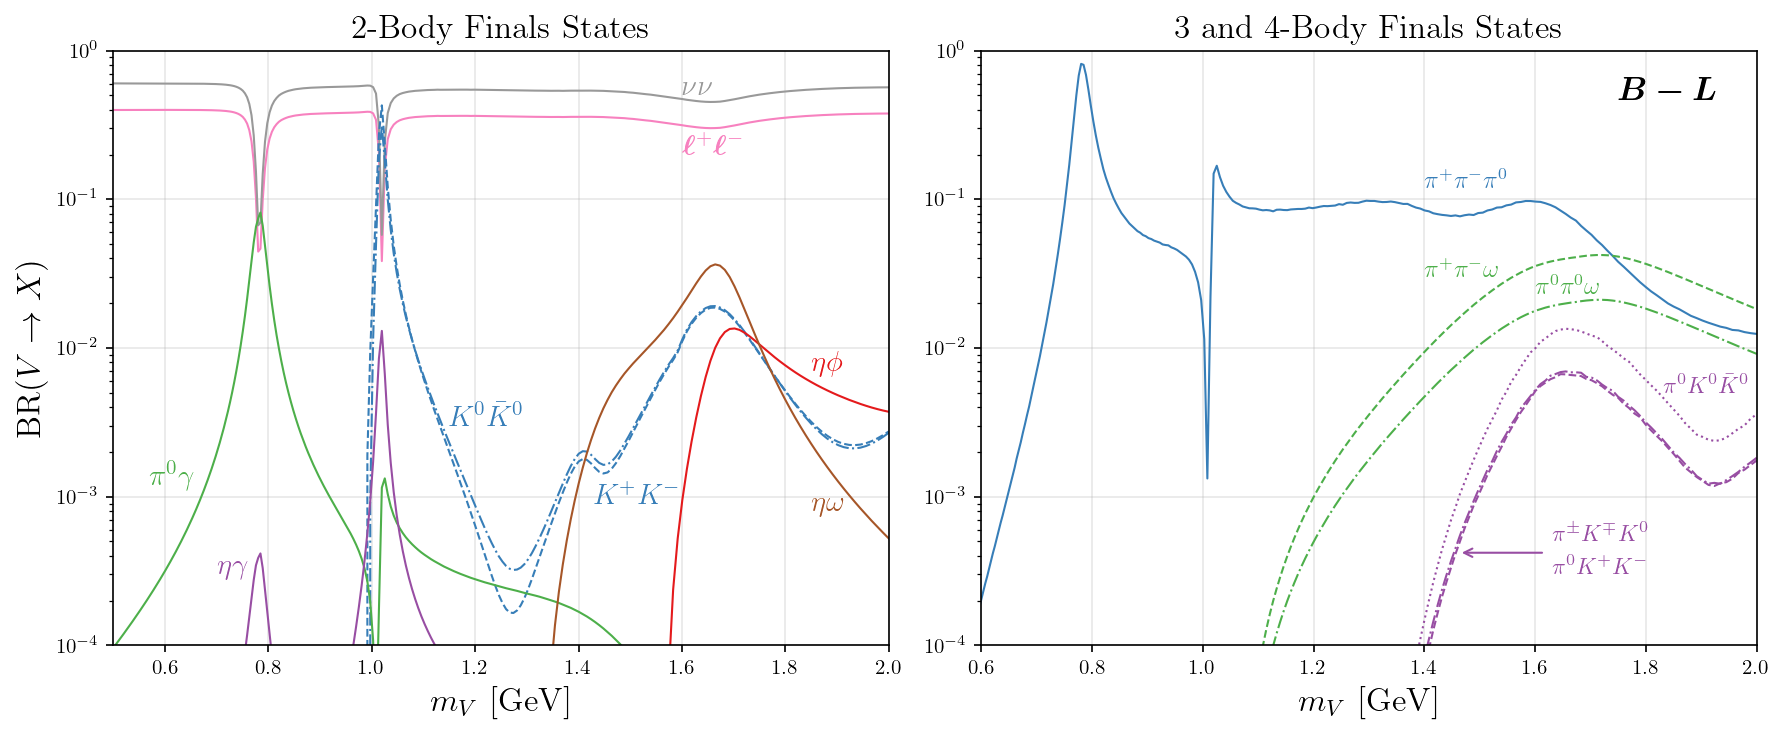

In [18]:
# cs = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600"]
# cs2 =["#ffd608","#ffb021","#ff864a","#ff5b74","#ff3da1","#f841cb","#b257ed","#1c6aff"]

# redsalsa
# rich_black_fogra
# sinopia


fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5),dpi=150)

ylims = (1e-3, 1.1)

twobody = {key: val for key, val in brs.items() if is_two_body(key)}
threebody = {key: val for key, val in brs.items() if is_three_body(key)}
fourbody = {key: val for key, val in brs.items() if is_four_body(key)}

ax1.set_prop_cycle(cycler(color=qualitative))
ax2.set_prop_cycle(cycler(color=qualitative))

for key, val in twobody.items() :
    color = two_body_conf[key]["color"]
    ls = two_body_conf[key]["ls"]
    label = two_body_conf[key]["label"]
    if np.max(val) > min(ylims):
        ax1.plot(mvs*1e-3, val, label=label, lw=1, color=color, ls=ls)


for key, val in threebody.items():
    color = three_body_conf[key]["color"]
    ls = three_body_conf[key]["ls"]
    label = three_body_conf[key]["label"]
    if np.max(val) > min(ylims):
        ax2.plot(mvs*1e-3, val, label=label, lw=1, color=color, ls=ls)

for key, val in fourbody.items():
    color = three_body_conf[key]["color"]
    ls = three_body_conf[key]["ls"]
    label = three_body_conf[key]["label"]
    if np.max(val) > min(ylims):
        ax2.plot(mvs*1e-3, val, label=label, lw=1, color=color, ls=ls)

conf = two_body_conf
ax1.text(0.57, 1.2e-3, conf["pi0 g"]["label"], fontdict={"size":14, "color": two_body_conf["pi0 g"]["color"]}, rotation=0)
ax1.text(0.7, 3e-4, conf["eta g"]["label"], fontdict={"size":14, "color": two_body_conf["eta g"]["color"]}, rotation=0)
ax1.text(1.43, 9e-4, r"$K^{+} K^{-}$", fontdict={"size":14, "color": two_body_conf["k k"]["color"]}, rotation=0)
ax1.text(1.15, 3e-3, r"$K^{0} \bar{K}^{0}$", fontdict={"size":14, "color": two_body_conf["k k"]["color"]}, rotation=0)
ax1.text(1.85, 7e-3, conf["eta phi"]["label"], fontdict={"size":14, "color": two_body_conf["eta phi"]["color"]}, rotation=0)
ax1.text(1.85, 8e-4, conf["eta omega"]["label"], fontdict={"size":14, "color": two_body_conf["eta omega"]["color"]}, rotation=0)
ax1.text(1.6, 2e-1, r"$\bm{\ell}^{+}\bm{\ell}^{-}$", fontdict={"size":14, "color": two_body_conf["l l"]["color"]}, rotation=0)
ax1.text(1.6, 5e-1, r"$\nu\nu$", fontdict={"size":14, "color": two_body_conf["nu nu"]["color"]}, rotation=0)

conf = three_body_conf
ax2.text(1.4, 1.2e-1, conf["pi pi pi0"]["label"], fontdict={"size":12, "color": conf["pi pi pi0"]["color"]})
ax2.text(1.4, 3e-2, conf["pi pi omega"]["label"], fontdict={"size":12, "color": conf["pi pi omega"]["color"]})
ax2.text(1.6, 2.3e-2, conf["pi0 pi0 omega"]["label"], fontdict={"size":12, "color": conf["pi0 pi0 omega"]["color"]})

color = conf["pi0 k k"]["color"]

key_to_label = lambda key: conf[key]["label"]

ax2.text(1.63, 3e-4, key_to_label("pi0 k k"), fontdict={"size": 11, "color": three_body_conf["pi0 k k"]["color"]})
# ax2.annotate("", xytext=(1.6, 2.5e-4), xy=(1.8, 2.2e-4), arrowprops=dict(arrowstyle="->", color=color, connectionstyle="angle3,angleA=-50,angleB=50") )

ax2.text(1.63, 5e-4, key_to_label("pi k k0"), fontdict={"size": 11, "color": three_body_conf["pi k k0"]["color"]})
ax2.annotate("", xytext=(1.62, 4.2e-4), xy=(1.46, 4.2e-4), arrowprops=dict(arrowstyle="->", color=color, connectionstyle="angle3,angleA=90") )

ax2.text(1.83, 5e-3, key_to_label("pi0 k0 k0"), fontdict={"size": 11, "color": three_body_conf["pi0 k0 k0"]["color"]})
# ax2.annotate("", xy=(1.44, 1.3e-4), xytext=(1.3,1.3e-4), arrowprops=dict(arrowstyle="<-", color=color))



ax1.set_yscale('log')
# plt.xscale('log')
# ax1.set_ylim(*ylims)
ax1.set_ylim(1e-4,1e0)
ax1.set_xlim(np.min(mvs)*1e-3, np.max(mvs)*1e-3)
ax1.set_ylabel(r"$\mathrm{BR}(V\to X)$", fontdict={"size": 16})
ax1.set_xlabel(r"$m_{V} \ [\mathrm{GeV}]$", fontdict={"size": 16})

ax2.set_xlabel(r"$m_{V} \ [\mathrm{GeV}]$", fontdict={"size": 16})
ax2.set_ylim(1e-4,1e0)
ax2.set_xlim(0.6, np.max(mvs)*1e-3)
ax2.set_yscale("log")
# ax1.legend()
# ax2.legend()
ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)
# plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 2], ["0.5", "0.6", "0.7", "0.8", "0.9", "1", "2"])
# plt.legend(bbox_to_anchor=(1.4,1.05), loc=1)

# ax2.text(1.5, 5e-1, r"\bm{\mathrm{Kinetic Mixing}}", fontdict={"size": 16})
ax2.text(1.75, 5e-1, r"$\bm{B - L}$", fontdict={"size": 16})

ax1.set_title(r"2-Body Finals States", fontdict={"size": 16})
ax2.set_title(r"3 and 4-Body Finals States", fontdict={"size": 16})
plt.tight_layout()
plt.savefig("./bl_brs.pdf")